#  **Loan Prediction ML Project**


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


In [17]:
# Load the dataset
df = pd.read_csv("Loan Prediction Dataset.csv")
# Drop Loan_ID as it's not useful for prediction
df = df.drop('Loan_ID', axis=1)

df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,5763,1230,142,360,1,Urban,Y
1,Female,No,0,Graduate,Yes,4378,2574,133,360,1,Semiurban,Y
2,Male,Yes,2,Not Graduate,No,12987,0,276,360,0,Rural,N
3,Female,No,0,Graduate,No,2576,1567,110,360,1,Semiurban,Y
4,Male,Yes,3+,Graduate,No,8521,3400,224,360,1,Urban,Y


In [18]:
# Basic info
print(df.info())
print(df.describe())
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             200 non-null    object
 1   Married            200 non-null    object
 2   Dependents         200 non-null    object
 3   Education          200 non-null    object
 4   Self_Employed      200 non-null    object
 5   ApplicantIncome    200 non-null    int64 
 6   CoapplicantIncome  200 non-null    int64 
 7   LoanAmount         200 non-null    int64 
 8   Loan_Amount_Term   200 non-null    int64 
 9   Credit_History     200 non-null    int64 
 10  Property_Area      200 non-null    object
 11  Loan_Status        200 non-null    object
dtypes: int64(5), object(7)
memory usage: 18.9+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       200.000000         200.000000  200.000000        200.000000   
mean       6886.275000        1

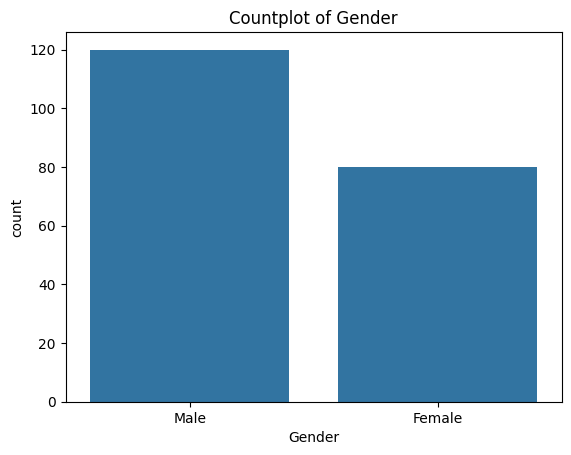

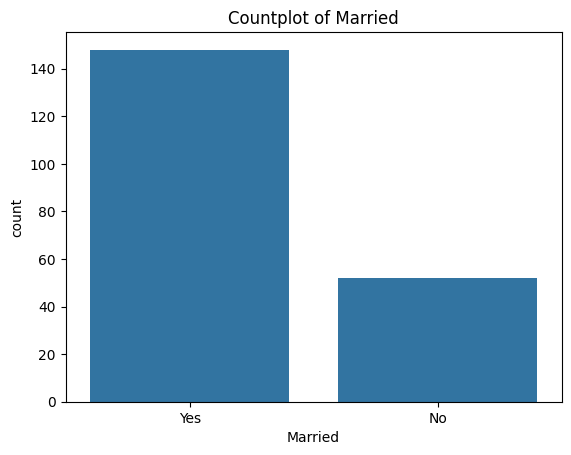

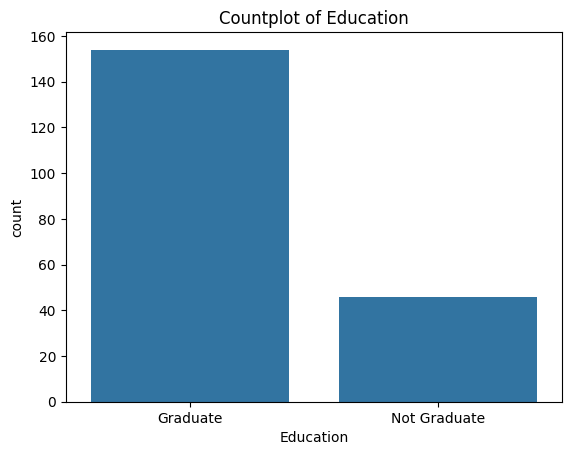

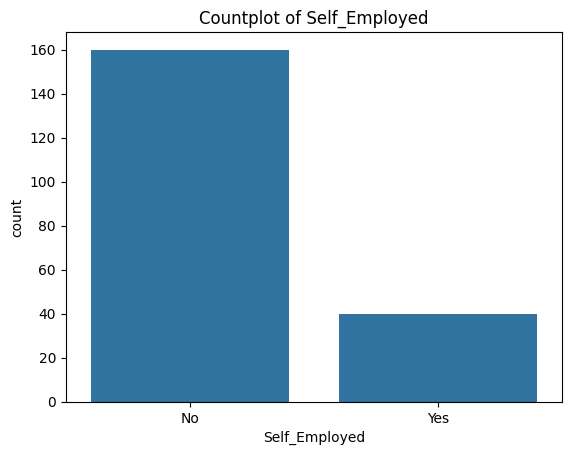

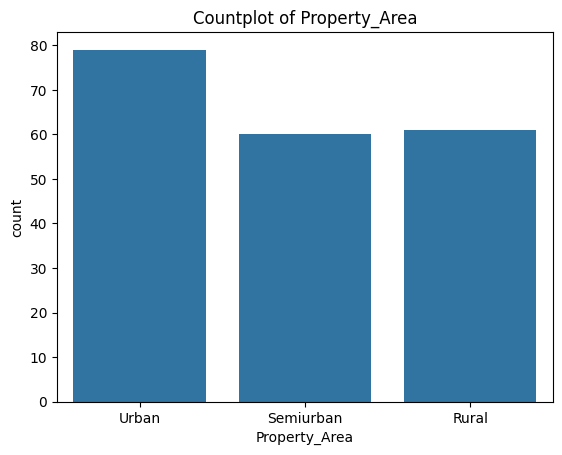

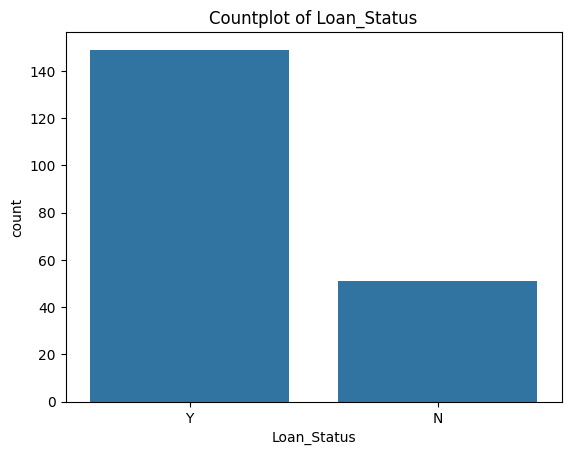

In [19]:
# Categorical distributions
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.show()


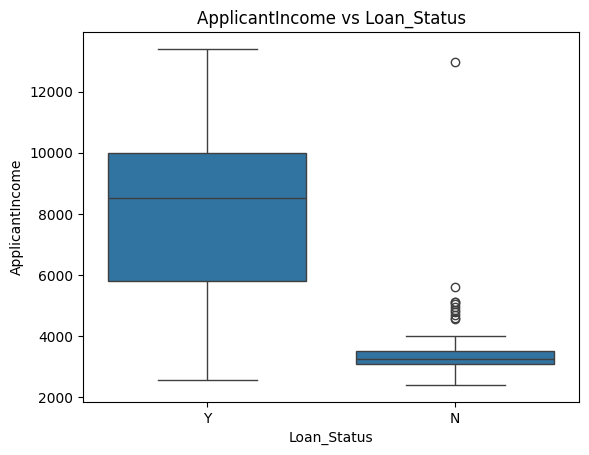

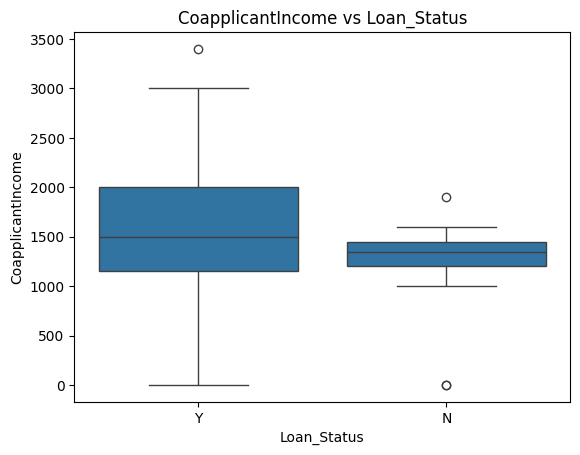

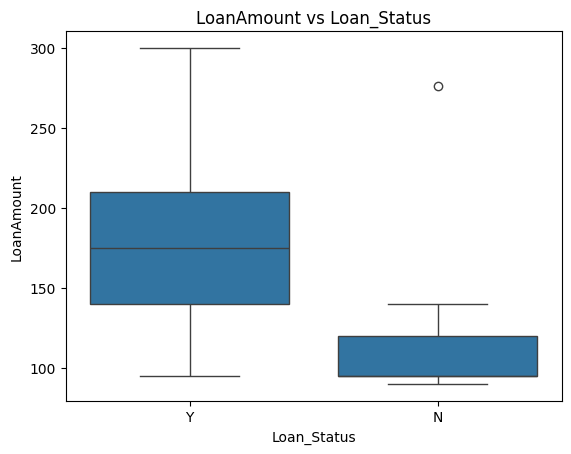

In [20]:
# Boxplots by Loan_Status
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    sns.boxplot(data=df, x='Loan_Status', y=col)
    plt.title(f"{col} vs Loan_Status")
    plt.show()


In [21]:
# Replace '3+' with 3 and convert
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# Encode categorical features
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df[col] = le.fit_transform(df[col])


In [22]:
# New features
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Income_to_Loan'] = df['Total_Income'] / (df['LoanAmount'] + 1)
df['Is_Single_Applicant'] = (df['CoapplicantIncome'] == 0).astype(int)


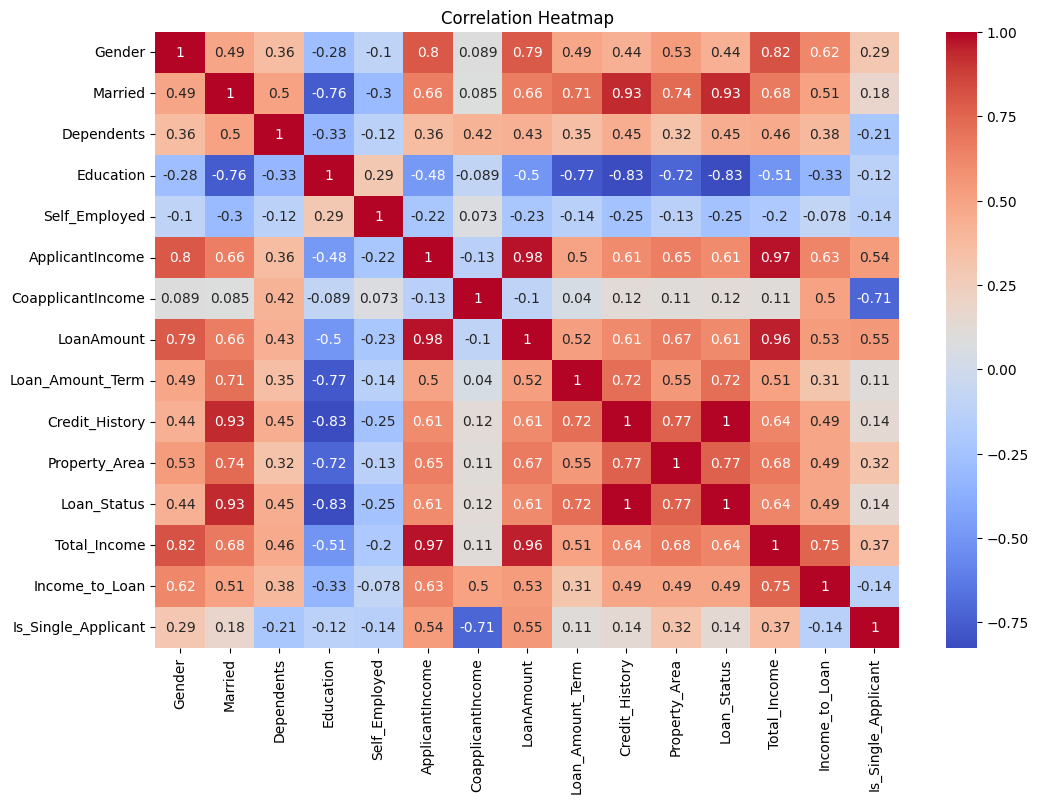

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [24]:
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
            'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
            'Credit_History', 'Property_Area', 'Total_Income', 'Income_to_Loan', 'Is_Single_Applicant']
X = df[features]
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        27

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [26]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Logistic Regression CV Accuracy: %.2f%%" % (scores.mean()*100))


Logistic Regression CV Accuracy: 99.38%


In [27]:
# Predict on new sample
sample = [[1, 1, 0, 1, 0, 5000, 0, 128, 360, 1, 2, 5000, 5000/128, 1]]
sample_scaled = scaler.transform(sample)
prediction = rf.predict(sample_scaled)
print("Loan Prediction for Sample (1=Approved, 0=Rejected):", prediction[0])


Loan Prediction for Sample (1=Approved, 0=Rejected): 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
